# Association Rule Learning using the Apriori Algorithm

| Key              | Value                                                                                                                                                                                                                                                                                                        |
|:-----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206 and BFS 4102                                                                                                                                                                                                                                                                                        |
| **Course Names** | BBT 4206: Business Intelligence II (Week 1-3 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13)                                                                                                                                                                                      |
| **Semester**     | January to April 2026                                                                                                                                                                                                                                                                                      |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                                                                                                                                 |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                                                                                                                                       |
| **Note**         | The lecture contains both theory and practice.<br/>This notebook forms part of the practice.<br/>It is intended for educational purposes only.<br/>Recommended citation: [BibTex](https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining/refs/heads/main/RecommendedCitation.bib) |

**Business context:** A supermarket chain seeks to uncover frequent item combinations from historical transactions to improve product placement, plan promotions, and increase cross-selling.

**Dataset:** The **"groceries"** dataset by **Hahsler et al. (2011)** contains 9,835 market basket transactions. Each row in the dataset represents items in a customer's shopping cart.

**Remote Environments:**

Do your best to setup your local environment as guided during the lab, however, if you have challenges setting it up, then you can use the following remote environments temporarily for the lab:<br/>

[![Colab](https://img.shields.io/badge/Open-Colab-orange?logo=googlecolab)](
https://colab.research.google.com/github/course-files/ClusteringandAssociationRuleMining/blob/main/7b_association_rule_learning.ipynb) (preferred option)

[![Codespaces](https://img.shields.io/badge/Open-Codespaces-blue?logo=github)](
https://github.com/codespaces/new/course-files/ClusteringandAssociationRuleMining) (alternative)

## Step 1: Install Dependencies and Import Required Libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For File and system operations [urllib3](https://urllib3.readthedocs.io/en/stable/)**
    - `urllib.request` is used for opening and downloading data from URLs.
    - `from pathlib import Path` is used to handle file paths in a platform-independent way.
    - `os` provides functions for interacting with the operating system, such as file and directory management.

2. **For data manipulation - [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html):**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames

3. **For data preprocessing and transformation - [mlxtend](https://rasbt.github.io/mlxtend/)**
    - `TransactionEncoder`: Converts transaction data into a binary matrix format

4. **For association rule learning - [mlxtend](https://rasbt.github.io/mlxtend/)**
    - `apriori`: Implements the Apriori algorithm for finding frequent itemsets
    - `association_rules`: Generates rules from frequent itemsets

5. **For data visualization - [matplotlib](https://matplotlib.org/stable/gallery/index.html) and [seaborn](https://seaborn.pydata.org/examples/index.html)**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For enhanced statistical visualizations

6. **For suppressing warnings - [warnings](https://docs.python.org/3/library/warnings.html)**
    - `warnings`: Controls warning messages
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages for cleaner output
    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

Confirm the following:
1. Which Python interpreter will be used to execute new code and where it is located
2. The Python version

Then install all the packages into the Jupyter notebook's virtual environment before importing them.

In [ ]:
import sys
sys.executable

In [ ]:
!python --version

### Set the Environment Variables - Option 1 (Using Python)

In [ ]:
%pip install python-dotenv

In [ ]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()

def resolve_environment():
    if "google.colab" in sys.modules:
      os.environ["ENVIRONMENT"] = "COLAB"
      return "COLAB"
    return os.environ.get("ENVIRONMENT")

env = resolve_environment()

if not env:
    raise RuntimeError("ENVIRONMENT is not set")
else:
   print(f"ENVIRONMENT variable is set to: '{env.upper()}'.")

In [ ]:
import subprocess

VALID_ENVIRONMENTS = {"PROD", "STAGING", "TESTING", "COLAB", "DEV"}

# Defaults to "DEV" if it is not set
ENV_SETUP = os.environ.get("ENVIRONMENT", "DEV").upper()

# Defaults to DEV if it is set to an invalid value
if ENV_SETUP not in VALID_ENVIRONMENTS:
    print(f"Warning: Invalid ENVIRONMENT '{ENV_SETUP}'. Defaulting to 'DEV'.")
    ENV_SETUP = "DEV"
print(f"Installing environment dependencies for '{ENV_SETUP}'.")

def silent_pip_install(cmd):
    result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode != 0:
        print(result.stderr.decode())

if ENV_SETUP == "PROD":
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/prod.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"STAGING"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/dev.txt " \
    "-c https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/constraints.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"TESTING"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/dev.txt " \
    "-c https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/constraints.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"COLAB"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/colab.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"DEV"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/dev.txt " \
    "-c https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/constraints.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

### Set the Environment Variables - Option 2 (Manually)

Set the environment by executing one of the following depending on your OS and shell:

- For Linux/MacOS Terminal (bash, zsh):

    ```shell
    export ENVIRONMENT=DEV
    echo $ENVIRONMENT
    ```

- For Windows Git Bash Terminal:

    ```shell
    export ENVIRONMENT=DEV
    echo $ENVIRONMENT
    ```

- For Windows CMD:

    ```shell
    set ENVIRONMENT=DEV
    echo %ENVIRONMENT%
    ```

- For Windows PowerShell:

    ```shell
    $env:ENVIRONMENT="DEV"
    $env:ENVIRONMENT
    ```

In [9]:
# For file and system operations
import urllib.request
from pathlib import Path
import os

# For data manipulation
import pandas as pd

# For data preprocessing and transformation
from mlxtend.preprocessing import TransactionEncoder

# For Association Rule Learning
from mlxtend.frequent_patterns import apriori, association_rules

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

1. **Data Loading Process**
    - Uses a context manager (`with` statement) for proper resource handling
    - Steps:
        1. Opens URL connection
        2. Reads binary content
        3. Decodes from bytes to UTF-8 string
        4. Splits into lines and processes each line

2. **Data Processing**
    - List comprehension transforms raw data into a structured format
    - Each transaction is processed by:
        - `strip()`: Removes whitespace
        - `split(',')`: Creates a list of items from comma-separated values

3. **Output**
    - Prints the total number of transactions
    - Shows the first three transactions as a sample


In [10]:
dataset_path = './data/groceries.csv'
url = 'https://github.com/course-files/ClusteringandAssociationRuleMining/raw/refs/heads/main/data/groceries.csv'

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    if not os.path.exists('./data'):
        os.makedirs('./data')
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Dataset downloaded")
else:
    print("✅ Dataset already exists locally")

path = Path(dataset_path)
content = path.read_text(encoding='utf-8')

transactions = []   # Start with an empty list

# Go through each line in the text
for line in content.splitlines():
    # Remove spaces and check if the line is not empty
    if line.strip():
        items = []  # Start a new shopping cart (list of items)

        # Go through each item in this line
        for item in line.split(","):
            # Remove spaces and ignore empty items
            if item.strip():
                items.append(item.strip())

        # Add this cleaned shopping cart to the transactions list
        transactions.append(items)

print(f"Total number of transactions: {len(transactions)}")
print("\nFirst three transactions:")
transactions[:3]

✅ Dataset already exists locally
Total number of transactions: 9835

First three transactions:


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

## Step 3: Convert the transaction list into a one-hot encoded DataFrame

**Purpose:**

The purpose of this chunk is to format the transaction data correctly. This is essential for:
- Running the Apriori algorithm
- Computing association rules
- Analyzing item frequencies and relationships

1. **Transaction Encoder Initialization**
    - Creates a new `TransactionEncoder` object called `encoder`
    - Purpose: To convert transaction lists into a binary matrix format

2. **Fit and Transform Process**
    - `encoder.fit(transactions)`:
        - Learns all unique items across all transactions
        - Creates a mapping of items to columns

    - `transform(transactions)`:
        - Converts transactions into a binary matrix
        - Each row represents one transaction
        - Each column represents one item
        - Values: True/False indicating item presence

3. **DataFrame Creation**
    - Converts the binary matrix into a `pandas` DataFrame
    - Uses `encoder.columns_` to retrieve the column names
    - Each column name is a unique item
    - Each row shows items present (True) or absent (False)

4. **Data Preview**
    - `transaction_data.head()`: Shows first five rows of transformed data

**Example:**
If the original transactions were:
```
Transaction 1: ["milk", "bread"]
Transaction 2: ["bread", "butter"]
```
The transformed data would look like this:
```
   milk  bread  butter
0  True   True  False
1  False  True   True
```

In [12]:
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
transaction_data = pd.DataFrame(onehot, columns=encoder.columns_)
transaction_data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Step 4: Generate frequent `itemsets` using the Apriori algorithm

1. **Apriori Algorithm Application**
    - Function: `apriori()`
    - Parameters:
        - `transaction_data`: Binary encoded transaction matrix
        - `min_support=0.02`: Minimum support threshold (2%)
        - `use_colnames=True`: Use item names instead of indices

2. **Support Threshold**
    - Support(itemset X) = (number of transactions containing itemset X) / (total transactions)
    - 0.02 means itemset X must appear in at least 2% of transactions
    - Helps filter out rare combinations

3. **Result Generation**
    - Creates a DataFrame containing:
        - `itemsets`: Combinations of items
        - `support`: Frequency of occurrence

4. **Result Processing**
    - `sort_values(by='support', ascending=False)`: Orders by support value (highest first)
    - `head(10)`: Shows top 10 most frequent itemsets

In the context of the mlxtend library and the Apriori algorithm, a frozenset is a built-in Python data type that functions as an immutable version of a standard set. While a standard set allows you to add or remove items, a frozenset is "frozen" in time—once it is created, its contents cannot be altered.

The primary reason the Apriori algorithm returns itemsets as frozensets is for hashability. In Python, only immutable objects can be hashed. Because the algorithm must frequently use these itemsets as keys in dictionaries or lookup tables to count their support across the dataset, they must remain constant.

In [13]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


## Step 5: Generate and display the association rules

1. **Rules Generation**
    - Function: `association_rules()`
    - Input: `frequent_itemsets` from Apriori algorithm
    - Parameters:
        - `metric='lift'`: A measure of how much more often items in the antecedent and the items in the consequent appear together in transactions compared to what would be expected if they were statistically independent.
        - `min_threshold=1.0`: Minimum lift value to include

2. **Rules and Key Metrics**
    - `antecedents`: "If" part of the rule (items in a basket)
    - `consequents`: "Then" part of the rule (likely additional items)
    - `support`: Frequency of items appearing together
    - `confidence`: Probability of consequent given antecedent
    - `lift`: Ratio of observed support to expected support

3. **Sorting and Display**
    - Sorts rules by confidence (highest first)
    - Shows the top 10 strongest associations
    - Displays most relevant columns for analysis

In [14]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

### Display the top 10 rules sorted by confidence

In [15]:
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
121,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235
16,(butter),(whole milk),0.027555,0.497248,1.946053
24,(curd),(whole milk),0.026131,0.490458,1.919481
115,"(root vegetables, other vegetables)",(whole milk),0.023183,0.489270,1.914833
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
29,(domestic eggs),(whole milk),0.029995,0.472756,1.850203
108,(whipped/sour cream),(whole milk),0.032232,0.449645,1.759754
90,(root vegetables),(whole milk),0.048907,0.448694,1.756031
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
33,(frozen vegetables),(whole milk),0.020437,0.424947,1.663094


### Display the top 10 rules sorted by lift and then confidence

In [17]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
116,"(other vegetables, whole milk)",(root vegetables),0.023183,0.309783,2.842082
117,(root vegetables),"(other vegetables, whole milk)",0.023183,0.212687,2.842082
71,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648
70,(tropical fruit),(pip fruit),0.020437,0.194767,2.574648
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
119,(other vegetables),"(root vegetables, whole milk)",0.023183,0.119811,2.449770
51,(other vegetables),(root vegetables),0.047382,0.244877,2.246605
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
120,"(other vegetables, whole milk)",(yogurt),0.022267,0.297554,2.132979
125,(yogurt),"(other vegetables, whole milk)",0.022267,0.159621,2.132979


### Filter the rules to show only those with high confidence and high lift

In [18]:
strong_rules = rules[
    (rules['confidence'] >= 0.2) &
    (rules['lift'] >= 2.0)
].sort_values(by='confidence', ascending=False)
strong_rules.head(15)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
121,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
59,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924
122,"(whole milk, yogurt)",(other vegetables),0.022267,0.397459,2.054131
116,"(other vegetables, whole milk)",(root vegetables),0.023183,0.309783,2.842082
120,"(other vegetables, whole milk)",(yogurt),0.022267,0.297554,2.132979
110,(whipped/sour cream),(yogurt),0.020742,0.289362,2.074251
107,(tropical fruit),(yogurt),0.029283,0.279070,2.000475
71,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648


## Step 6: Remove duplicate and redundant rules

In [20]:
def remove_duplicates(rules_df):
    rules_df = rules_df.sort_values(by=['lift', 'confidence'], ascending=[False, False]).reset_index(drop=True)
    unique_rules = []

    for i, row_i in rules_df.iterrows():
        is_redundant = False
        for j, row_j in enumerate(unique_rules):
            if row_i['consequents'] == row_j['consequents'] and row_i['antecedents'].issubset(row_j['antecedents']):
                is_redundant = True
                break

        if not is_redundant:
            unique_rules.append(row_i)

    return pd.DataFrame(unique_rules)

# Apply the function to the strong rules
nonredundant_rules = remove_duplicates(strong_rules)
nonredundant_rules = nonredundant_rules.sort_values(by=['lift', 'support'], ascending=[False, False])
nonredundant_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,"(other vegetables, whole milk)",(root vegetables),0.023183,0.309783,2.842082
1,(root vegetables),"(other vegetables, whole milk)",0.023183,0.212687,2.842082
2,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648
3,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
6,"(other vegetables, whole milk)",(yogurt),0.022267,0.297554,2.132979
7,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924
8,(whipped/sour cream),(yogurt),0.020742,0.289362,2.074251
9,"(whole milk, yogurt)",(other vegetables),0.022267,0.397459,2.054131
10,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235
11,(tropical fruit),(yogurt),0.029283,0.279070,2.000475


In [21]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
116,"(other vegetables, whole milk)",(root vegetables),0.023183,0.309783,2.842082
117,(root vegetables),"(other vegetables, whole milk)",0.023183,0.212687,2.842082
71,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648
70,(tropical fruit),(pip fruit),0.020437,0.194767,2.574648
114,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
119,(other vegetables),"(root vegetables, whole milk)",0.023183,0.119811,2.449770
51,(other vegetables),(root vegetables),0.047382,0.244877,2.246605
50,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
120,"(other vegetables, whole milk)",(yogurt),0.022267,0.297554,2.132979
125,(yogurt),"(other vegetables, whole milk)",0.022267,0.159621,2.132979


In [23]:
# Eliminate bidirectional redundancy in rules
def remove_bidirectional_redundancy(rules_df):
    # Create a set to track unique antecedent-consequent pairs
    seen_rules = set()
    filtered_rules = []  # Store the final filtered rules

    for _, row in rules_df.iterrows():
        # Combine antecedents and consequents into a frozenset so the order doesn't matter
        rule_pair = frozenset([frozenset(row['antecedents']), frozenset(row['consequents'])])

        # Only keep the rule if it hasn't already been seen
        if rule_pair not in seen_rules:
            seen_rules.add(rule_pair)
            filtered_rules.append(row)

    return pd.DataFrame(filtered_rules)

# Apply the function to the strong rules
cleaned_rules = remove_bidirectional_redundancy(nonredundant_rules)
cleaned_rules = cleaned_rules.sort_values(by=['lift', 'support'], ascending=[False, False])
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,"(other vegetables, whole milk)",(root vegetables),0.023183,0.309783,2.842082
2,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648
3,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
6,"(other vegetables, whole milk)",(yogurt),0.022267,0.297554,2.132979
7,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924
8,(whipped/sour cream),(yogurt),0.020742,0.289362,2.074251
9,"(whole milk, yogurt)",(other vegetables),0.022267,0.397459,2.054131
10,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235
11,(tropical fruit),(yogurt),0.029283,0.279070,2.000475


**List of Rules**

In [24]:
cleaned_rules = cleaned_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,"(other vegetables, whole milk)",(root vegetables),0.023183,0.309783,2.842082
2,(pip fruit),(tropical fruit),0.020437,0.270161,2.574648
3,"(root vegetables, whole milk)",(other vegetables),0.023183,0.474012,2.449770
6,"(other vegetables, whole milk)",(yogurt),0.022267,0.297554,2.132979
7,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924
8,(whipped/sour cream),(yogurt),0.020742,0.289362,2.074251
9,"(whole milk, yogurt)",(other vegetables),0.022267,0.397459,2.054131
10,"(other vegetables, yogurt)",(whole milk),0.022267,0.512881,2.007235
11,(tropical fruit),(yogurt),0.029283,0.279070,2.000475


## Step 7: Save the rules as a CSV file

In [26]:
# Define the output path
output_path = './rule/top_rules_7b.csv'

# Ensure the data directory exists
if not os.path.exists('./rule'):
    os.makedirs('./rule')

# Save the top rules as a CSV file
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_csv(output_path, index=False)
print(f"\n✅ Top rules saved to {output_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files # type: ignore
    files.download(output_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped rule download link.")


✅ Top rules saved to ./rule/top_rules_7b.csv
❌ Not running in Google Colab, skipped rule download link.


## Step 8: Visualize rules

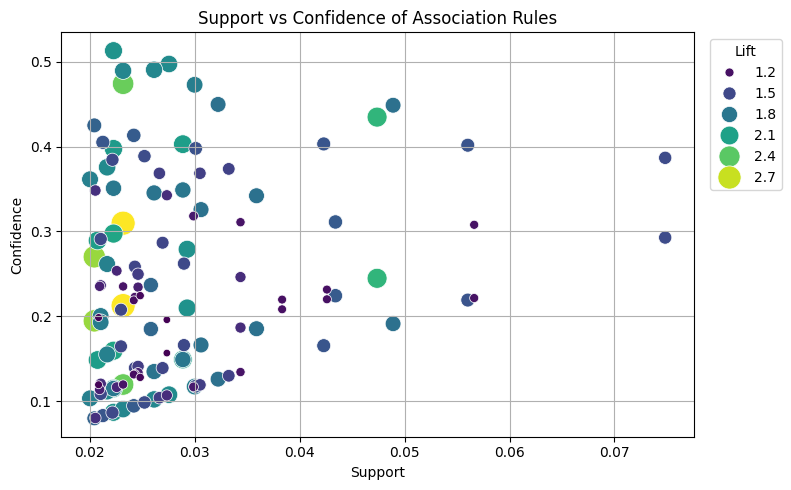

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

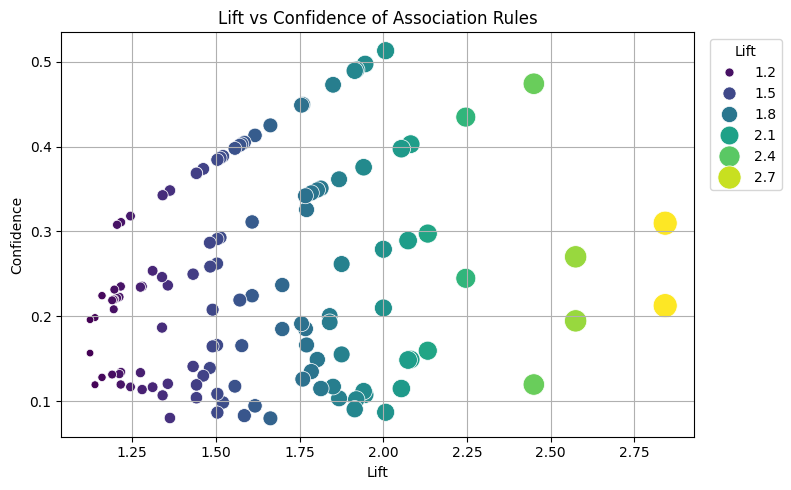

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='lift', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Lift vs Confidence of Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

# References
Hahsler, M., Chelluboina, S., Hornik, K., & Buchta, C. (2011). The arules R-Package Ecosystem: Analyzing Interesting Patterns from Large Transaction Datasets. Journal of Machine Learning Research, 12, 1977–1981.
